# Székely Dániel - JAXC3C 

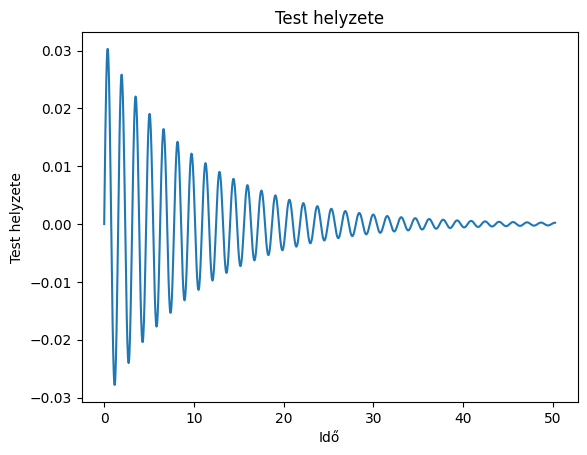

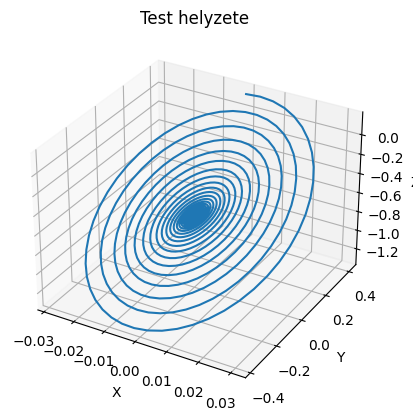

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import random
from IPython.display import clear_output

k = 0.008 * 1000 # Rugó állandója (N/mm * 1000 = N/m)
m = 0.5 # Test tömege (kg)
g = 9.81  # Gravitációs gyorsulás (m/s^2)
L = (m*g)/k # Rugó nyújtatlan hossza (m) [képlet Szutyányi Márk tanár Úrral egyeztetve gyakorlati óra után] megadott tömeg és rugóállandó alapján

T = 2*np.pi*np.sqrt(m/k) # Lengésidő, a rugó tömeg és rugóállandója alapján

c_r = 0.1  # Rugó vesztesége 0 és 1 között
c_m = 0.05  # Test vesztesége 0 és 1 között

# A test kezdeti helyzete
# Az x koordinátája mindig 0, a y és z koordináták véletlenszerűen változnak (asszimetrikus indítás) egy előre meghatározott intervallumon belül.
x0 = 0
y0 = random.uniform(0.1, 0.5)
z0 = random.uniform(0.1, 0.5)

# A test kezdeti sebessége véletlenszerűen változik egy előre meghatározott intervallumon belül.
szog = np.random.rand() * np.pi  # Véletlenszerű szög
vx0 = abs(random.uniform(0.1, 0.5))
vy0 = abs(random.uniform(0.1, 0.5) * np.sin(szog))
vz0 = abs(random.uniform(0.1, 0.5) * np.cos(szog))

# Kezdeti állapotvektor tartalmazza a test kezdeti helyzetét és sebességét
state0 = np.array([x0, y0, z0, vx0, vy0, vz0])

# Ábrázoláshoz szükséges skálázás 
scale = 1
if (k/1000) < 1:
    scale = k*4
else:
    scale = k*(k/10000)*0.5
    
# Időpillanatok
t_start = 0 # Kezdeti időpont
t_end = scale*T  # Az oszcilláció energiájának csökkenéséhez hosszabb időt szimulálunk
num_points = 1500 # Pontosság
t_eval = np.linspace(t_start, t_end, num_points) # Időpontok a szimulációhoz

# Mozgásegyenlet
def motion_equations(t, state):
    """Ez a kód egy test mozgását szimulálja a 3D térben.
    A kód figyelembe veszi a gravitáció hatásait.
    A test gyorsulását a mozgás második Newton-törvénye alapján számolja ki.
    A kód visszaadja a test pozícióját és sebességét bármely adott időpontban.
    """
    x, y, z, vx, vy, vz = state # A test pozíciója és sebessége
    dxdt = vx # A test sebességének x komponense
    dydt = vy # A test sebességének y komponense 
    dzdt = vz  # A test sebességének z komponense
    dvxdt = (-k/m * x) - (c_r/m * vx) - (c_m/m * abs(vx) * np.sign(x)) # A test gyorsulásának x komponense
    dvydt = (-k/m * y) - (c_r/m * vy) - (c_m/m * abs(vy) * np.sign(y)) # A test gyorsulásának y komponense
    dvzdt = (-k/m * z) - (c_r/m * vz) - (c_m/m * abs(vz) * np.sign(z)) - g # A test gyorsulásának z komponense
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt] # A test pozíciója és sebessége

"""  A method paraméterrel választhatjuk ki a számítási módszert, amely most a Runge-Kutta 45-ös módszer (RK45)
 RK45: egy numerikus integrálási módszer, amelyet differenciálegyenletek megoldására használnak.
 Olyan iteratív eljárás, amely lépésenként közelíti a differenciálegyenlet megoldását, és 
 ezzel a lépésköz méretét csökkentve növeli a közelítés pontosságát.
 Az eredmény az sol változóba kerül, amely egy OdeResult objektum (egy eredménytároló ez teszi lehetővé a test mozgását az idő függvényében), amely 
 tartalmazza az állapotvektorokat az időpillanatokra és a megoldási folyamatot. """
sol = solve_ivp(motion_equations, [t_start, t_end], state0, t_eval=t_eval, method='RK45')

plt.plot(sol.t, sol.y[0])
plt.xlabel('Idő')
plt.ylabel('Test helyzete')
plt.title('Test helyzete')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Test helyzete')
plt.show()

# Videó animáció

0.00 %


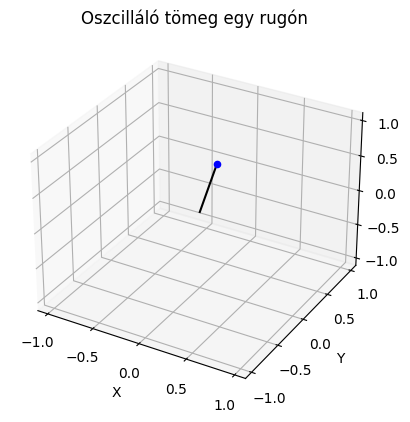

In [8]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, bitrate=550)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(i):
    ax.clear()
    new_scale = scale/30
    ax.set_xlim([-new_scale, new_scale])
    ax.set_ylim([-new_scale, new_scale])
    ax.set_zlim([-new_scale, new_scale])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Oszcilláló tömeg egy rugón')
    x, y, z, vx, vy, vz = sol.y[:, i]
    ax.scatter(x, y, z, color='blue')
    ax.plot([0, x], [0, y], [0, z], color='black')
    clear_output()
    print(f'{i/num_points*100:.2f} %')

ani = animation.FuncAnimation(fig, update, frames=num_points, repeat=False)
ani.save('oscillating_mass.mp4', writer=writer)